#  A Computer Vision Example
A scenario where we can recognize different items of clothing, trained from a dataset containing 10 different types.

## Liberary import

Let's start with our import of TensorFlow

In [16]:
import numpy as np
import tensorflow as tf
print(tf.__version__)

1.14.0


The Fashion MNIST data is available directly in the tf.keras datasets API.

In [3]:
mnist = tf.keras.datasets.fashion_mnist

In [4]:
type(mnist)

tensorflow.python.util.deprecation_wrapper.DeprecationWrapper

In [7]:
?mnist.load_data ## helps you to find the return type

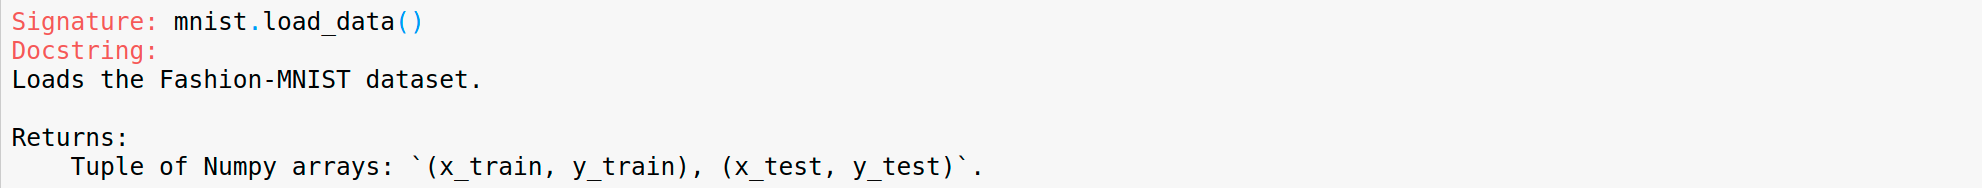

Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.


In [9]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [18]:
print('trainng image: ',training_images.shape)
print('trainig label', training_labels.shape)
print('testing image', test_images.shape)
print('testing label',test_labels.shape)

print('distinct images in dataset: ', np.unique(training_labels))

trainng image:  (60000, 28, 28)
trainig label (60000,)
testing image (10000, 28, 28)
testing label (10000,)
distinct images in dataset:  [0 1 2 3 4 5 6 7 8 9]


## image inspection
What does these values look like? Let's print a training image, and a training label to see...Experiment with different indices in the array. For example, also take a look at index 42...that's a a different boot than the one at index 0


label of indx 39 :  6
[[  0   0   0   0   0   0   0   2   3   0   0  24 223 220 222 206  69   0   0   3   2   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   4   0   0   0   0 163 255 248 247 255 212   0   0   0   0   4   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0  82 198 255 232 229 249 249 236 227 248 180 102   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  83 213 238 235 223 223 234 240 236 224 224 234 239 242 214  71   0   0   0   0   0   0]
 [  0   0   0   0   0   7 230 227 214 220 221 224 233 229 224 238 225 222 222 217 227 238  30   0   0   0   0   0]
 [  0   0   0   0   0 120 239 217 220 222 222 217 219 226 222 223 222 225 226 222 218 239 162   0   0   0   0   0]
 [  0   0   0   0   0 164 239 223 218 222 221 224 225 229 223 225 222 223 223 224 219 239 203   0   0   0   0   0]
 [  0   0   0   0   0 187 239 229 222 224 226 227 227 227 222 231 230 223 222 223 223 242 218   0   0   0   0   0]
 [  0   0   0   0   0 212 238 233 225 224 223 223 222 227 

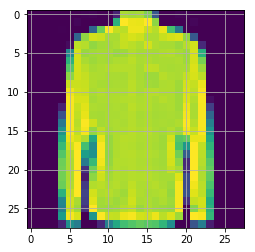

In [20]:
import matplotlib.pyplot as plt

indx=39
plt.imshow(training_images[indx])
print('label of indx',indx,': ',training_labels[indx])
print(training_images[indx])

    As the length of the image did not turn out to be enough, we use np.set_printoptions to enlarge it

In [ ]:
import numpy as np
np.set_printoptions(linewidth=200)

plt.imshow(training_images[indx])
print('label of indx',indx,': ',training_labels[indx])
print(training_images[indx])

All of the values in the number are between 0 and 255. Lets do '**normalizing**'

In [ ]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

## Model declaration

In [21]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)]) ## we use 10, as we got 0-9 image type

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now. 

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!


## compile the data

In [24]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 141us/sample - loss: 0.0233 - acc: 0.9924
Epoch 2/5
60000/60000 [==============================] - 8s 134us/sample - loss: 0.0177 - acc: 0.9943
Epoch 3/5
60000/60000 [==============================] - 8s 133us/sample - loss: 0.0153 - acc: 0.9948
Epoch 4/5
60000/60000 [==============================] - 8s 134us/sample - loss: 0.0157 - acc: 0.9952
Epoch 5/5
60000/60000 [==============================] - 9s 143us/sample - loss: 0.0102 - acc: 0.9969


Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like 0.9098. This tells you that your neural network is about 91% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 91% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

But how would it work with unseen data? That's why we have the test images. We can call model.evaluate, and pass in the two sets, and it will report back the loss for each. Let's give it a try:

In [25]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 52us/sample - loss: 0.0997 - acc: 0.9793


[0.09972997853099551, 0.9793]

For me, that returned a accuracy of about .8838, which means it was about 88% accurate. As expected it probably would not do as well with *unseen* data as it did with data it was trained on!  As you go through this course, you'll look at ways to improve this. 

To explore further, try the below exercises:


# Exploration Exercises

### Exercise 1:
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent? 

In [ ]:
test_indx=4
print(test_labels[test_indx])
print(plt.imshow(test_images[test_indx]))

In [ ]:
classifications = model.predict(test_images)
print(classifications[test_indx])

Hint: try running print(test_labels[0]) -- and you'll get a 9. Does that help you understand why this list looks the way it does? 

In [ ]:
print(test_labels[0])

### What does this list represent?


1.   It's 10 random meaningless values
2.   It's the first 10 classifications that the computer made
3.   It's the probability that this item is each of the 10 classes


####Answer: 
The correct answer is (3)

The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value (https://github.com/zalandoresearch/fashion-mnist#labels), i.e. the first value in the list is the probability that the image is of a '0' (T-shirt/top), the next is a '1' (Trouser) etc. Notice that they are all VERY LOW probabilities.

For the 9 (Ankle boot), the probability was in the 90's, i.e. the neural network is telling us that it's almost certainly a 7.

### How do you know that this list tells you that the item is an ankle boot?


1.   There's not enough information to answer that question
2.   The 10th element on the list is the biggest, and the ankle boot is labelled 9
2.   The ankle boot is label 9, and there are 0->9 elements in the list


####Answer
The correct answer is (2). Both the list and the labels are 0 based, so the ankle boot having label 9 means that it is the 10th of the 10 classes. The list having the 10th element being the highest value means that the Neural Network has predicted that the item it is classifying is most likely an ankle boot

### Exercise 2: 
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case? 


In [26]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

1.14.0
Epoch 1/5
60000/60000 [==============================] - 10s 159us/sample - loss: 0.1862 - acc: 0.9452
Epoch 2/5
60000/60000 [==============================] - 11s 177us/sample - loss: 0.0741 - acc: 0.9770
Epoch 3/5
60000/60000 [==============================] - 9s 152us/sample - loss: 0.0487 - acc: 0.9843
Epoch 4/5
60000/60000 [==============================] - 10s 165us/sample - loss: 0.0345 - acc: 0.9891
Epoch 5/5
10000/10000 [==============================] - 1s 55us/sample - loss: 0.0794 - acc: 0.9790
[4.1496692e-10 2.7143524e-11 4.6180024e-10 7.3031822e-07 2.9239493e-13 2.1804676e-09 1.3874770e-15 9.9999905e-01 1.3182434e-10 1.8506677e-07]
7


In [27]:
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)

Epoch 1/5
60000/60000 [==============================] - 8s 140us/sample - loss: 0.0211 - acc: 0.9930
Epoch 2/5
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0162 - acc: 0.9944
Epoch 3/5
60000/60000 [==============================] - 8s 140us/sample - loss: 0.0158 - acc: 0.9951
Epoch 4/5
60000/60000 [==============================] - 9s 143us/sample - loss: 0.0141 - acc: 0.9954
Epoch 5/5
10000/10000 [==============================] - 1s 58us/sample - loss: 0.0809 - acc: 0.9822


[0.08085019733471034, 0.9822]

In [28]:
classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

[5.4646643e-16 1.5126640e-14 3.4810139e-12 1.1594065e-13 1.9478004e-18 8.1065611e-16 2.1905963e-19 1.0000000e+00 3.7894126e-14 9.3050567e-12]
7


###Question 1. Increase to 1024 Neurons -- What's the impact?

1. Training takes longer, but is more accurate
2. Training takes longer, but no impact on accuracy
3. Training takes the same time, but is more accurate


####Answer
The correct answer is (1) by adding more Neurons we have to do more calculations, slowing down the process, but also figuring out more patterns in the images, and hence a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!

### Exercise 3: 

What would happen if you remove the Flatten() layer. Why do you think that's the case? 

You get an error about the shape of the data. It may seem vague right now, but it reinforces the rule of thumb that the first layer in your network should be the same shape as your data. Right now our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that 28,28 into a 784x1. Instead of wriitng all the code to handle that ourselves, we add the Flatten() layer at the begining, and when the arrays are loaded into the model later, they'll automatically be flattened for us.

In [29]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([#tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

1.14.0
Epoch 1/5


InvalidArgumentError: logits and labels must have the same first dimension, got logits shape [896,10] and labels shape [32]
	 [[{{node loss_3/output_1_loss/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]]

### Exercise 4: 

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5

You get an error as soon as it finds an unexpected value. Another rule of thumb -- the number of neurons in the last layer should match the number of classes you are classifying for. In this case it's the digits 0-9, so there are 10 of them, hence you should have 10 neurons in your final layer.

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

### Exercise 5: 

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10. 

Ans: There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary. 

In [33]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)

1.14.0
Epoch 1/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.1856 - acc: 0.9447
Epoch 2/5
60000/60000 [==============================] - 6s 101us/sample - loss: 0.0795 - acc: 0.9748
Epoch 3/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0546 - acc: 0.9824
Epoch 4/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0403 - acc: 0.9870
Epoch 5/5
10000/10000 [==============================] - 0s 40us/sample - loss: 0.0673 - acc: 0.9816


[0.06725340455302795, 0.9816]

In [32]:
classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

[1.0501920e-11 2.9047493e-07 1.3853391e-07 1.7616206e-06 4.8815018e-11 3.8910689e-12 4.2442229e-14 9.9999785e-01 4.0915993e-10 3.8333972e-08]
7


### Exercise 6: 

Consider the impact of training for more or less epochs. Why do you think that would be the case? 

Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases. This is a side effect of something called 'overfitting' which you can learn about [somewhere] and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

In [34]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)


1.14.0
Epoch 1/30
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2592 - acc: 0.9256
Epoch 2/30
60000/60000 [==============================] - 3s 48us/sample - loss: 0.1156 - acc: 0.9657
Epoch 3/30
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0785 - acc: 0.9757
Epoch 4/30
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0591 - acc: 0.9822
Epoch 5/30
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0452 - acc: 0.9861
Epoch 6/30
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0375 - acc: 0.9880
Epoch 7/30
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0292 - acc: 0.9908
Epoch 8/30
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0246 - acc: 0.9924
Epoch 9/30
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0198 - acc: 0.9941
Epoch 10/30
60000/60000 [==============================] - 3s 48us/sample -

[0.13056562586740342, 0.978]

In [35]:
classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

[1.8335507e-23 2.2141474e-17 1.5087122e-12 4.2937240e-09 2.6037732e-32 1.0785014e-31 2.7663417e-28 1.0000000e+00 1.1485050e-17 5.1788797e-22]
7


### Exercise 7: 

Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results? 

In [36]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

1.14.0
Epoch 1/5
60000/60000 [==============================] - 5s 92us/sample - loss: 0.2017
Epoch 2/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0801
Epoch 3/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0509
Epoch 4/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0358
Epoch 5/5
10000/10000 [==============================] - 0s 42us/sample - loss: 0.0621
[6.7726458e-10 8.6016465e-09 1.2725420e-07 1.8319685e-06 6.5006691e-13 5.7497395e-08 1.5032003e-11 9.9999785e-01 1.5839117e-08 1.3796974e-07]
7


### Exercise 8: 

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [37]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])


1.14.0
Epoch 1/5
60000/60000 [==============================] - 5s 88us/sample - loss: 0.4735
Epoch 2/5
59424/60000 [============================>.] - ETA: 0s - loss: 0.3598
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3603
